# Exploratory Data Analysis



In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Data Processing

In [7]:
#read the data file with pandas

df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
#format the data
df = df.drop(columns=['id'])
df = df.rename(columns=str.lower)
df = df[df.gender != 'Other']



In [10]:
#Handle missing values of BMI

# Impute missing 'bmi' values with the median for each stroke group
df['bmi'] = df.groupby('stroke')['bmi'].transform(lambda x: x.fillna(x.median()))

# Check for missing values again to confirm imputation
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## 2. Explore the relationship between different variables and stroke

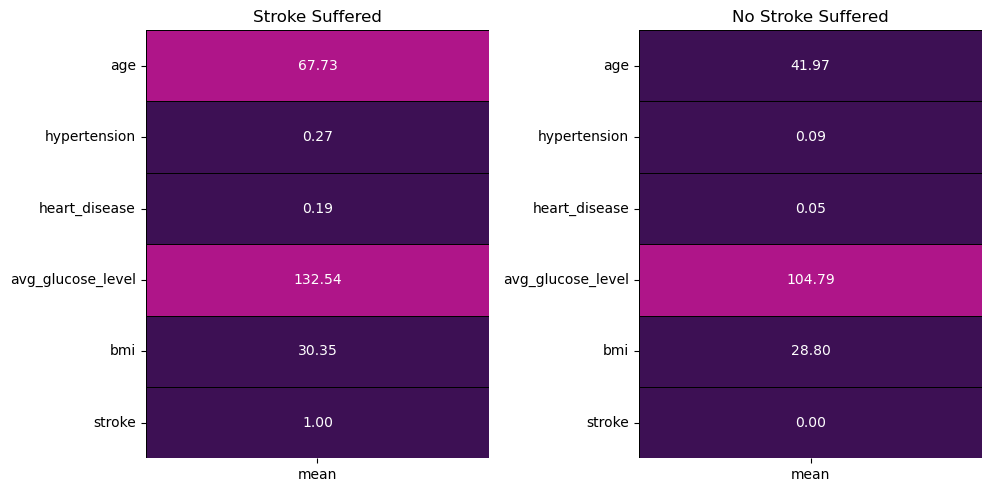

In [13]:
# Profile for people with stroke and without stroke

# Separate statistics for stroke and no stroke
stroke = df[df['stroke'] == 1].describe().T
no_stroke = df[df['stroke'] == 0].describe().T

# Define a proper colormap
from matplotlib.colors import ListedColormap
colors = ListedColormap(['#3D1054', '#AF1589'])

# Create subplots with proper figsize for 2 plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Heatmap for stroke
sns.heatmap(stroke[['mean']], annot=True, cmap=colors, linewidths=0.4,
            linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('Stroke Suffered')

# Heatmap for no stroke
sns.heatmap(no_stroke[['mean']], annot=True, cmap=colors, linewidths=0.4,
            linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('No Stroke Suffered')

plt.tight_layout(pad=1)
plt.show()


In [14]:
#Feature Engineering

# Age groups
# Create age groups
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 35:
        return 'Young Adult'
    elif age < 55:
        return 'Middle-aged'
    elif age < 75:
        return 'Senior'
    else:
        return 'Elderly'

df['age_group'] = df['age'].apply(categorize_age)

# BMI Binning
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 24.9, 29.9, df['bmi'].max()],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese'],
    right=False
)

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,Obese
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.7,never smoked,1,Senior,Overweight
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle-aged,Obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly,Normal


In [18]:
categorical_cols = ['age_group', 'bmi_category', 'gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for col in categorical_cols:
    print(f"Percentage of stroke for {col}:")
    # Group by the current categorical column and stroke, then unstack to get counts
    stroke_counts = df.groupby([col, 'stroke']).size().unstack(fill_value=0)
    # Calculate the percentage of stroke cases within each category
    stroke_percentages = stroke_counts.apply(lambda x: x / x.sum() * 100, axis=1)
    # Display the percentage for stroke (stroke=1)
    if 1 in stroke_percentages.columns:
        display(stroke_percentages[[1]].rename(columns={1: 'Stroke Percentage (%)'}))
    else:
        print("No stroke cases found in this column.")
    print("-" * 50)

Percentage of stroke for age_group:


stroke,Stroke Percentage (%)
age_group,
Child,0.233645
Elderly,19.691120
Middle-aged,2.288022
Senior,8.723236
Young Adult,0.101215


--------------------------------------------------
Percentage of stroke for bmi_category:


stroke,Stroke Percentage (%)
bmi_category,
Underweight,0.296736
Normal,2.880658
Overweight,6.952204
Obese,5.192802


--------------------------------------------------
Percentage of stroke for gender:


stroke,Stroke Percentage (%)
gender,
Female,4.709419
Male,5.106383


--------------------------------------------------
Percentage of stroke for ever_married:


stroke,Stroke Percentage (%)
ever_married,
No,1.651481
Yes,6.561288


--------------------------------------------------
Percentage of stroke for work_type:


stroke,Stroke Percentage (%)
work_type,
Govt_job,5.022831
Never_worked,0.000000
Private,5.095759
Self-employed,7.936508
children,0.291121


--------------------------------------------------
Percentage of stroke for residence_type:


stroke,Stroke Percentage (%)
residence_type,
Rural,4.536411
Urban,5.200308


--------------------------------------------------
Percentage of stroke for smoking_status:


stroke,Stroke Percentage (%)
smoking_status,
Unknown,3.044041
formerly smoked,7.918552
never smoked,4.756871
smokes,5.323194


--------------------------------------------------


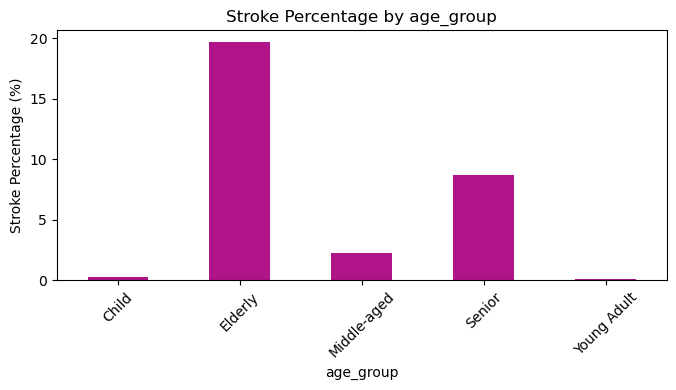

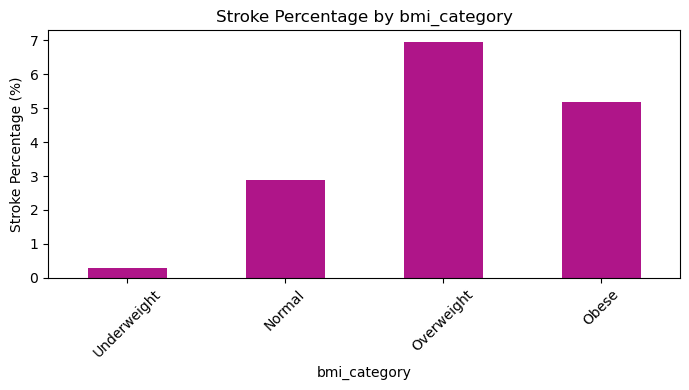

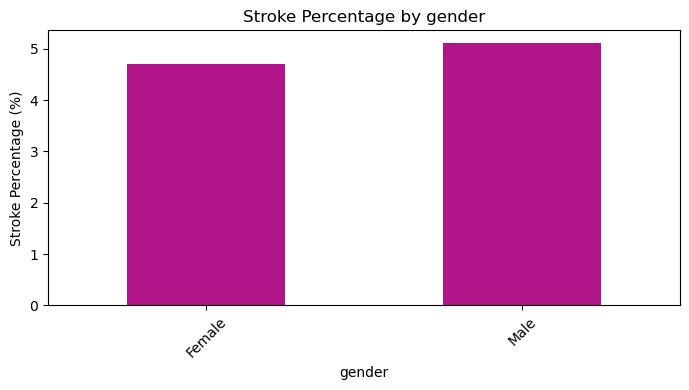

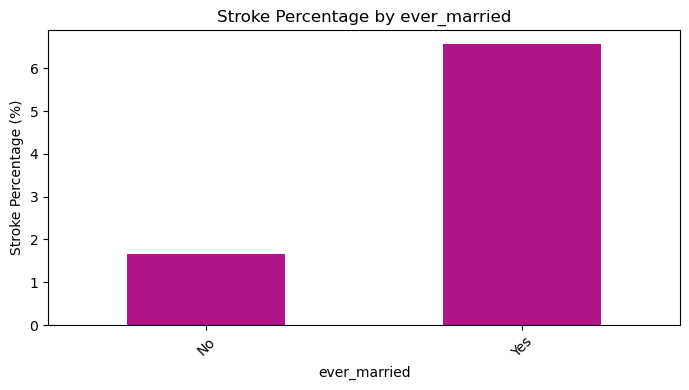

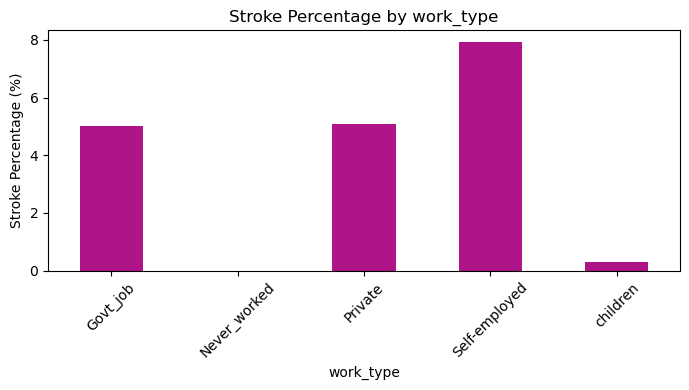

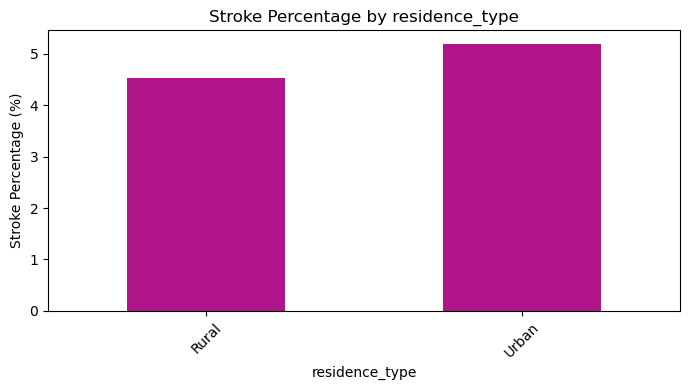

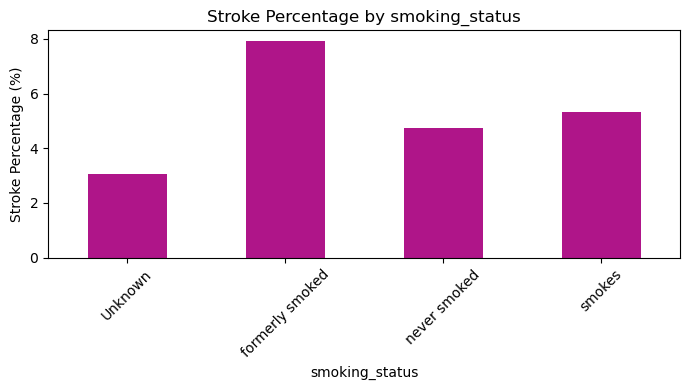

In [19]:
# Bar charts for categorical variables vs. stroke percentage

for col in categorical_cols:
    stroke_counts = df.groupby([col, 'stroke']).size().unstack(fill_value=0)
    stroke_percentages = stroke_counts.apply(lambda x: x / x.sum() * 100, axis=1)
    if 1 in stroke_percentages.columns:
        plt.figure(figsize=(7, 4))
        stroke_percentages[1].plot(kind='bar', color='#AF1589')
        plt.ylabel('Stroke Percentage (%)')
        plt.title(f'Stroke Percentage by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Correlation between variables

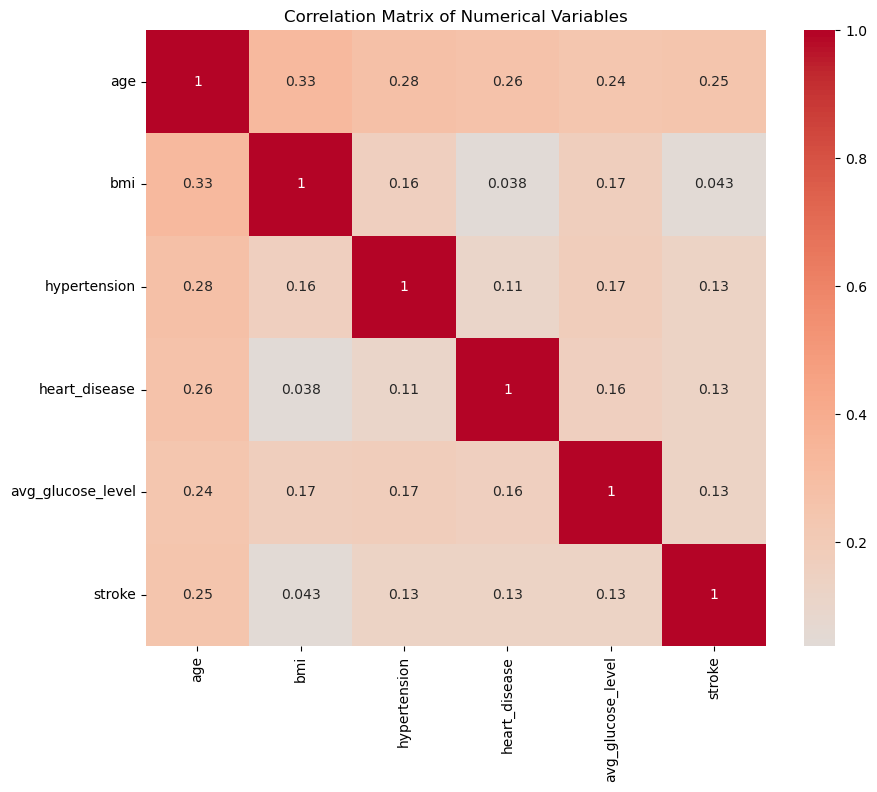

In [17]:
# Correlation matrix for numerical variables
numerical_cols = ['age', 'bmi', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']
df_numerical = df[numerical_cols].copy()

plt.figure(figsize=(10, 8))
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()